In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import torch
import torch.nn as nn

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
num_points = 25#50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])

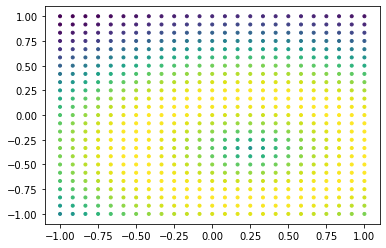

In [3]:
# %matplotlib inline
plt.scatter(X1, X2, marker='.', c=Y)
plt.show()

## Interactive plot two Relu

In [4]:
W1 = torch.Tensor([[1, 1], [-1, -1]])
W2 = torch.Tensor([[1, 0],
                   [0, 1]])

W12 = None
# W = torch.eye(2)+0.1
torch.manual_seed(123)
W = torch.randn(2,2)
W = np.linalg.svd(W)[0]

In [5]:
_a = widgets.FloatSlider(W[0,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_00')
_b = widgets.FloatSlider(W[0,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_01')
_c = widgets.FloatSlider(W[1,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_10')
_d = widgets.FloatSlider(W[1,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_11')


_e = widgets.FloatSlider(W1[0,0], min=-3, max=3, step=0.05, continuous_update=False, description='W1_00')
_f = widgets.FloatSlider(W1[0,1], min=-3, max=3, step=0.05, continuous_update=False, description='W1_01')
_g = widgets.FloatSlider(W1[1,0], min=-3, max=3, step=0.05, continuous_update=False, description='W1_10')
_h = widgets.FloatSlider(W1[1,1], min=-3, max=3, step=0.05, continuous_update=False, description='W1_11')


_i = widgets.FloatSlider(W2[0,0], min=-3, max=3, step=0.05, continuous_update=False, description='W2_00')
_j = widgets.FloatSlider(W2[0,1], min=-3, max=3, step=0.05, continuous_update=False, description='W2_01')
_k = widgets.FloatSlider(W2[1,0], min=-3, max=3, step=0.05, continuous_update=False, description='W2_10')
_l = widgets.FloatSlider(W2[1,1], min=-3, max=3, step=0.05, continuous_update=False, description='W2_11')


_row0 = widgets.HBox([_a, _b])
_row1 = widgets.HBox([_c, _d])
_ui_W = widgets.VBox([_row0, _row1])

_row0b = widgets.HBox([_e, _f])
_row1b = widgets.HBox([_g, _h])
_ui_W1 = widgets.VBox([_row0b, _row1b])

_row0c = widgets.HBox([_i, _j])
_row1c = widgets.HBox([_k, _l])
_ui_W2 = widgets.VBox([_row0c, _row1c])

_ui2 = widgets.VBox([_ui_W, _ui_W1, _ui_W2])


def interactive_function(a, b, c, d, e, f, g, h, i, j, k, l):
    global W, W1, W2, W12, yout
    %matplotlib inline
    plt.figure(figsize=(8,8))
    
    
    W = torch.FloatTensor([[a,b],[c,d]])
    W1 = torch.FloatTensor([[e, f],[g, h]])
    W1 = W1/torch.norm(W1, dim=0, keepdim=True)
#     print(W1)    
    W2 = torch.FloatTensor([[i,j], [k, l]])
    W12 = torch.matmul(W1, W2)
#     print(W12/torch.norm(W12, dim=0, keepdim=True))
    print(W12)
    s = np.linalg.svd(W12+W)[1]
    print(s)
    s = np.linalg.svd(W12)[1]
    print(s)
    print(np.linalg.eig(W12+W)[0])
#     print(v)
    
    with torch.no_grad():
        yout = torch.matmul(xx, W)
        res = torch.matmul(xx, W1)
        res = nn.functional.relu(res)
#         bth = (res>0).type(torch.float32).sum(dim=1)>1
        res = torch.matmul(res, W2)
        yout = yout+res
    
    y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
    
    U,D,V = np.linalg.svd(W)
    vec, val = U[:,0], D[0]
    colors = np.array(['r', 'b'])
    follows = (torch.matmul(res, torch.Tensor(vec)) > -val).type(torch.int)
    ptcol = colors[follows]
    
    plt.scatter(y1, y2, c=ptcol, marker='o')
    plt.plot(y1, y2, lw=0.5)
    plt.plot(y1.T, y2.T, c='k', lw=0.5)
    
    plt.scatter(X1, X2, c=Y, marker='.', alpha=0.5)
    plt.plot(X1, X2, c='k', lw=0.5, alpha=0.5)
    plt.plot(X1.T, X2.T, c='k', lw=0.5, alpha=0.5)
    
    
    ## x-axis
    plt.plot(y1[12,:], y2[12,:], c='k', lw=2)
    x, y, tx, ty = y1[12,12], y2[12,12], y1[24,12], y2[24,12]
    u, v = tx-x, ty-y
    plt.arrow(x, y, u, v, lw=2, color='r', head_starts_at_zero=True, width=0.01)
    
    plt.plot(y1[:,12], y2[:,12], c='k', lw=2)
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    
    plt.show()
    
    print(W)
    s, v = np.linalg.eig(W)
    print(s)
    print(v)
    
        

interactive_plot = widgets.interactive_output(interactive_function,
                                              {'a': _a, 'b': _b, 'c': _c, 'd': _d,
                                               'e': _e, 'f': _f, 'g': _g, 'h': _h,
                                               'i': _i, 'j': _j, 'k': _k, 'l': _l}
                                             )

display(_ui2, interactive_plot)

Output()

In [6]:
W1, W2

(tensor([[ 0.7071,  0.7071],
         [-0.7071, -0.7071]]), tensor([[1., 0.],
         [0., 1.]]))

In [7]:
### Conclusion 0

'''
1. The singular values of overall transformation > 0 will make it invertible
2. 
'''

'\n1. The singular values of overall transformation > 0 will make it invertible\n2. \n'

## Rough

In [8]:
W12 = torch.matmul(W1, W2)
print(W12)
print(W12/torch.norm(W12, dim=0))

print('Norms')
print(torch.norm(W12, dim=0, keepdim=True))
print(torch.norm(W12, dim=1, keepdim=True))

tensor([[ 0.7071,  0.7071],
        [-0.7071, -0.7071]])
tensor([[ 0.7071,  0.7071],
        [-0.7071, -0.7071]])
Norms
tensor([[1.0000, 1.0000]])
tensor([[1.0000],
        [1.0000]])


In [9]:
y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)

In [10]:
# %matplotlib tk
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, y1, cmap='plasma')
# ax.scatter(X1, X2, y2, cmap='plasma')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.pause(10)
# plt.show()

In [11]:
i = 25*5+10
i

135

In [12]:
%matplotlib inline
with torch.no_grad():
    yout_ = torch.matmul(xx, W)
    res = torch.matmul(xx, W1)
    res = nn.functional.relu(res)

    mask = (res>0).type(torch.float32)*1.0+0.0 ## for relu
    We = torch.matmul(W1, mask.reshape(-1,2,1)*W2)      

    res = torch.matmul(res, W2)
    yout = yout_+res

In [13]:
yout_

tensor([[ 1.0700,  0.9247],
        [ 1.0639,  0.8416],
        [ 1.0579,  0.7585],
        ...,
        [-1.0579, -0.7585],
        [-1.0639, -0.8416],
        [-1.0700, -0.9247]])

In [14]:
res

tensor([[0.0000, 0.0000],
        [0.0589, 0.0589],
        [0.1179, 0.1179],
        ...,
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000]])

In [15]:
aa = torch.matmul(yout_,torch.Tensor(vec))

NameError: name 'vec' is not defined

In [ ]:
bb = torch.matmul(res,torch.Tensor(vec))

In [ ]:
aa

In [16]:
bb

NameError: name 'bb' is not defined

In [17]:
cc = torch.matmul(xx, torch.Tensor(vec))
dd = torch.matmul(yout, torch.Tensor(vec))

NameError: name 'vec' is not defined

In [18]:
cc

NameError: name 'cc' is not defined

In [19]:
dd

NameError: name 'dd' is not defined

In [319]:
dd-cc > 0

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [259]:
# U,D,V = np.linalg.svd(We[i])
# U,D,V

In [325]:
U,D,V = np.linalg.svd(W)
U,D,V

(array([[-0.99735874, -0.0726333 ],
        [ 0.0726333 , -0.99735874]], dtype=float32),
 array([1., 1.], dtype=float32),
 array([[0., 1.],
        [1., 0.]], dtype=float32))

In [326]:
vec, val = U[:,0], D[0]
vec, val

(array([-0.99735874,  0.0726333 ], dtype=float32), 1.0)

In [327]:
W1 = W1/torch.norm(W1, dim=0, keepdim=True)
W12 = torch.matmul(W1, W2)
W12

tensor([[ 0.7071,  1.3081],
        [-0.7071, -1.3081]])

In [251]:
# follows = (torch.matmul(res, torch.Tensor(vec)) < val).type(torch.int)
# torch.matmul(, torch.Tensor(vec))

In [252]:
# colors = np.array(['b', 'r'])
# ptcol = colors[follows]
# ptcol

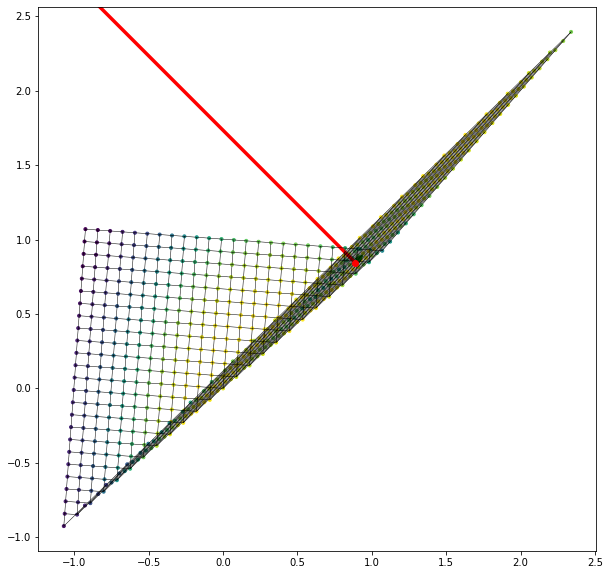

In [255]:
y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
proj = (We*W.reshape(1, 2, 2)).sum(dim=2)
# proj = ((We+W)*W.reshape(1, 2, 2)).sum(dim=1)

# ###
# proj_ = proj.min(dim=1)[0]
# nofold = (proj_ > -1).data.numpy().astype(int)
# #     nofold = (proj_ > 0).data.numpy().astype(int)
# fc = colors[nofold]    
    
plt.figure(figsize=(10,10))
plt.scatter(y1, y2, c=Y, marker='.')
plt.plot(y1, y2, c='k', lw=0.5)
plt.plot(y1.T, y2.T, c='k', lw=0.5)
plt.scatter([y1.reshape(-1)[i]], [y2.reshape(-1)[i]], c='r', zorder=10)

UD = np.matmul(U,np.diag(D))
plt.arrow(y1.reshape(-1)[i], y2.reshape(-1)[i], UD[0,0], UD[1,0], 
          lw=2, color='r', head_starts_at_zero=True, width=0.01)
plt.arrow(y1.reshape(-1)[i], y2.reshape(-1)[i], UD[0,1], UD[1,1], 
          lw=2, color='g', head_starts_at_zero=True, width=0.01)
plt.axis('equal')
plt.show()



In [35]:
We.shape

torch.Size([625, 2, 2])

In [192]:
torch.norm(We[i], dim=1, keepdim=True)

tensor([[0.7210],
        [0.9549]])

In [193]:
np.matmul(np.matmul(U,np.diag(D)), V)

array([[-0.19906746,  0.692984  ],
       [ 0.26363525, -0.9177543 ]], dtype=float32)

In [194]:
U[:,0]

array([-0.60259485,  0.79804724], dtype=float32)

In [195]:
np.matmul(U,np.diag(D))

array([[-7.2100949e-01,  5.2093294e-09],
       [ 9.5486987e-01,  3.9334953e-09]], dtype=float32)

In [196]:
np.linalg.svd(We[i]+W)

(array([[-0.9720492 , -0.23477744],
        [-0.23477744,  0.9720492 ]], dtype=float32),
 array([1.0892591 , 0.10724883], dtype=float32),
 array([[-0.7715716, -0.6361425],
        [ 0.6361425, -0.7715716]], dtype=float32))

In [197]:
np.linalg.eig(We[i]+W)

(array([ 1.        , -0.11682176], dtype=float32),
 array([[ 0.9611302 , -0.60259485],
        [ 0.27609548,  0.79804724]], dtype=float32))